In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def compute_cost(x, y, w, b):
  m = x.shape[0]
  j_wb = 0
  for i in range(m):
    f_wb = w*x[i] + b
    j_wb += (f_wb - y[i]) ** 2
  
  j_wb = j_wb * (1/2*m)

  return j_wb

def linear_regression_line(x, w, b):
  m=df.shape[0]
  f_wb = np.zeros(m)
  for i in range(m):
    f_wb[i] = w*df['YearsExperience'][i] + b

  return f_wb

def compute_gradient(x, y, w, b):
  dj_dw = 0
  dj_db = 0

  for i in range(len(x)):
    f_wb = w * x[i] + b
    dj_dw_i = (f_wb - y[i]) * x[i]
    dj_db_i = f_wb - y[i]
    dj_dw += dj_dw_i
    dj_db += dj_db_i
  
  dj_dw = dj_dw * (1/len(x))
  dj_db = dj_db * (1/len(x))

  return dj_dw, dj_db

def gradient_descent(x, y, w, b, alpha, num_iter, cost_function, gradient_function):
  J_history = []
  w_history = []
  b_history = []
  
  for i in range(num_iter):
    dj_dw, dj_db = gradient_function(x, y, w, b)
    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    if i<100000:
      J_history.append(cost_function(x, y, w, b))
      w_history.append(w)
      b_history.append(b)
    
    if i% math.ceil(num_iter/10) == 0:
      print(f"Iteration {i} for parameters w = {w} and b = {b}, cost is: {J_history[-1]:0.2e}")
      print(f"Gradient is {dj_dw:0.3e} for w and {dj_db:0.3e} for b")
  
  return w, b, J_history, w_history, b_history

In [3]:
df = pd.read_csv('Salary_dataset.csv')

In [4]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
iterations = 10000
tmp_alpha = 1.0e-2

w, b, J_hist, w_hist, b_hist = gradient_descent(df['YearsExperience'], df['Salary'], 0, 0, tmp_alpha, iterations, compute_cost, compute_gradient)

Iteration 0 for parameters w = 4850.044133333334 and b = 760.04, cost is: 1.17e+12
Gradient is -4.850e+05 for w and -7.600e+04 for b
Iteration 1000 for parameters w = 9879.928601219774 and b = 21918.621894264932, cost is: 1.49e+10
Gradient is 8.854e+01 for w and -6.033e+02 for b
Iteration 2000 for parameters w = 9504.92118565751 and b = 24473.740872888877, cost is: 1.41e+10
Gradient is 1.132e+01 for w and -7.711e+01 for b
Iteration 3000 for parameters w = 9456.987236888157 and b = 24800.339593709716, cost is: 1.41e+10
Gradient is 1.447e+00 for w and -9.856e+00 for b
Iteration 4000 for parameters w = 9450.86025552919 and b = 24842.085878455833, cost is: 1.41e+10
Gradient is 1.849e-01 for w and -1.260e+00 for b
Iteration 5000 for parameters w = 9450.077096587838 and b = 24847.421944334237, cost is: 1.41e+10
Gradient is 2.363e-02 for w and -1.610e-01 for b
Iteration 6000 for parameters w = 9449.97699216586 and b = 24848.104007402384, cost is: 1.41e+10
Gradient is 3.021e-03 for w and -2.05

In [12]:
years_exp = 10
est_salary = w * years_exp + b
print(f"Estimated salary for {years_exp} years of experience is {est_salary:0.2f}")

Estimated salary for 10 years of experience is 119347.83


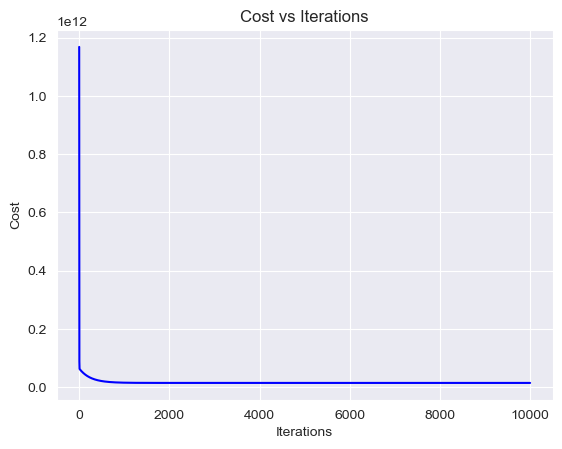

In [ ]:
sns.set_style('darkgrid')
plt.plot(J_hist, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

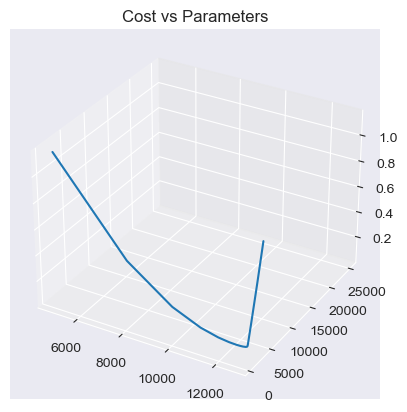

<Figure size 4000x4000 with 0 Axes>

In [ ]:
sns.set_style('darkgrid')
axis = plt.axes(projection='3d')
axis.plot3D(w_hist, b_hist, J_hist)
plt.title('Cost vs Parameters')
plt.figure(figsize=(40, 40))
plt.show()